# Comparative Analysis of Apple Stock Against SPDR FUND XLK


## Introduction
This analysis is conducted to examine the relationship between Apple Inc.'s stock and the Technology Select Sector SPDR Fund (XLK), a benchmark ETF representing the tech sector. The primary objective is to monitor the performance of Apple Stock over the years and to assess its correlation with market movements as reflected by XLK. We will identify trends, measure Apple's responsiveness to market changes, and understand its position within the tech landscape. This will offer insights into how closely aligned Apple's stock is with the broader technology sector and provide a basis for evaluating investment strategies.



## Volatilitiy 

According to the analysis, Apple has experienced higher volatility in the years 2020–2022, with a volatility metric of roughly 2. In contrast, the stock's volatility notably decreased in 2023, indicating a period of greater stability.

Several key factors led to volatility in 2022, the primary reason being supply chain challenges and lockdowns in China. Apple's stock price faced a major setback in its supply chain due to measures taken by China to control the spread of COVID-19, thus affecting the production and supply of iPhones. The situation aggravated for Apple when the overall tech sector faced a period of reevaluation of valuations, where market analysts speculated that the valuations of tech companies, including Apple, were high. Furthermore, the Federal Reserve's influence on interest rates created uncertainty in investment decisions in the tech sector.

For further detailed analysis and expert opinions on the factors affecting Apple's stock volatility, readers may refer to articles available on InvestorPlace.

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

# Reading the datasets and parseing the 'Date' columns
df = pd.read_csv('apple_stock.csv', parse_dates=['Date'])
benchmark_df = pd.read_csv('XLK.csv', parse_dates=['date'])

In [4]:
# Setting 'Date' as index
df.set_index('Date', inplace=True)
benchmark_df.set_index('date', inplace=True)

benchmark_df = benchmark_df[benchmark_df.index.year >= 2014]

# Extracting Quarter and calculating quarterly returns for Apple stock
df['Quarter'] = df.index.to_period('Q')
apple_quarterly_returns = df.groupby('Quarter')['Adj Close'].mean().pct_change()

# Extracting Quarter and calculating quarterly returns for Benchmark stock
benchmark_df['Quarter'] = benchmark_df.index.to_period('Q')
benchmark_quarterly_returns = benchmark_df.groupby('Quarter')['close'].mean().pct_change()

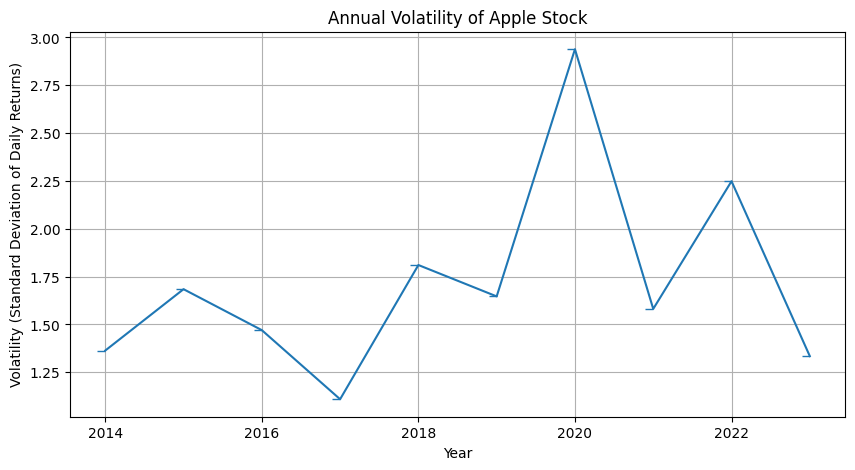

In [5]:
# Calculating daily returns of stock as percentage change
df['Daily Return'] = df['Adj Close'].pct_change() * 100
#Calculating daily returns of benchmark as percentage change 
benchmark_df['benchmark_daily_return'] = benchmark_df['close'].pct_change() * 100
# Group by Year and calculate standard deviation for each year
volatility_by_year = df.groupby(df.index.year)['Daily Return'].std()
volatility_df = pd.DataFrame(volatility_by_year).reset_index()
plt.figure(figsize= (10,5))
plt.plot(volatility_df['Date'], volatility_df['Daily Return'], marker = 0)
plt.title("Annual Volatility of Apple Stock")
plt.xlabel("Year")
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.grid(True)
plt.show()

In [6]:
# Extracting Month to calculate monthly returns of the apple and benchmark stock
df['Month'] = df.index.to_period('M')
stock_monthly_returns = df.groupby('Month')['Adj Close'].mean().pct_change()

benchmark_df['Month'] = benchmark_df.index.to_period('M')
benchmark_df_monthly_returns = benchmark_df['close'].pct_change()


In [7]:
# Check and remove duplicates
df = df[~df.index.duplicated(keep='first')]
benchmark_df = benchmark_df[~benchmark_df.index.duplicated(keep='first')]

In [8]:
# Creating a common date range
common_dates = df.index.intersection(benchmark_df.index)

In [9]:
# Reindex or merge the datasets using the common date range
apple_stock_aligned = df.reindex(common_dates)
benchmark_df_aligned = benchmark_df.reindex(common_dates)

In [10]:
# Handling missing data
apple_stock_aligned.ffill(inplace=True)
benchmark_df_aligned.ffill(inplace=True)



## Correlation Analysis 
Analysing the relationship between Apple stock and benchmark SPDR FUND XLK. As per the data, there is a strong correlation between the stock and the benchmark, indicating that the stock's performance is closely tied with the broader market represented by the benchmark. Suggesting that the stock is sensitive to the same macroeconomic factors, industry trends and market sentiments affecting the benchmark. Moreover, the stock carries the similar risk profile to the overall market represented by benchmark stating that the stock is likely experiencing similar volatility and market risk as the tech sector in general. Moreover, investor looking into diversing their portfolio this stock might not be provide diversification benefits due to its high correlation with the benchmark. Furthermore, investors that are looking for stock's that outperformance the market, this stock might be more suitable for passive investment due to its strong correlation with the overall tech market.

In [11]:
# CORRELATION ANALYSIS STEPS
aligned_stock_returns = apple_stock_aligned['Adj Close'].pct_change()
aligned_benchmark_returns = benchmark_df_aligned['close'].pct_change()
correlation = aligned_stock_returns.corr(aligned_benchmark_returns)
print(f"The correlation coefficient between the stock and the benchmark is: {correlation:.2f}")

The correlation coefficient between the stock and the benchmark is: 0.84


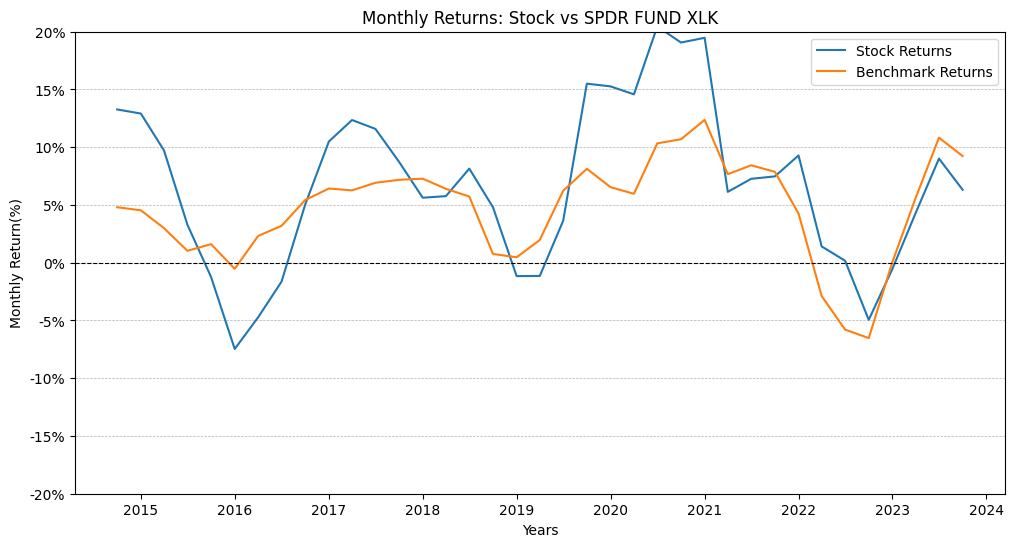

In [12]:
# Plotting the rolling average for monthly returns
# Convert PeriodIndex to DatetimeIndex before rolling mean calculation
if isinstance(stock_monthly_returns.index, pd.PeriodIndex):
    stock_monthly_returns.index = stock_monthly_returns.index.to_timestamp()

if isinstance(benchmark_df_monthly_returns.index, pd.PeriodIndex):
    benchmark_df_monthly_returns.index = benchmark_df_monthly_returns.index.to_timestamp()

apple_quarterly_returns.index = apple_quarterly_returns.index.to_timestamp()
benchmark_quarterly_returns.index = benchmark_quarterly_returns.index.to_timestamp()
window_size = 3
stock_smoothed = apple_quarterly_returns.rolling(window=window_size).mean()
benchmark_smoothed = benchmark_quarterly_returns.rolling(window=window_size).mean()

plt.figure(figsize=(12,6))
plt.plot(stock_smoothed, label='Stock Returns')
plt.plot(benchmark_smoothed, label='Benchmark Returns')
plt.ylabel('Monthly Return(%)')
plt.xlabel("Years")

# Formatting the y-axis ticks to show the percentages
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
plt.ylim([-0.2, 0.2])

plt.title('Monthly Returns: Stock vs SPDR FUND XLK')
plt.legend()
plt.show()


In [13]:
#Calculating Risk-Adjusted returns of the Stock
annual_risk_free_rate = 0.0388
daily_risk_free_rate = annual_risk_free_rate/252

In [14]:
#Calculating the Daily excess returns for the storck and the benchmark
df['excess_daily_return'] = df['Daily Return'] - daily_risk_free_rate
benchmark_df['excess_daily_return'] = benchmark_df['benchmark_daily_return'] - daily_risk_free_rate

## Sharpe Ratio
When calculating the Sharpe ratio of the Apple stock and the benchmark the stock has slightly better risk-adjusted returns than the benchmark, meaning that for each unit of risk, the stock has generated more excess return over the risk-free rate compared to the benchmark. This suggests that the stock has been a slightly safer investment compared to the benchmark when considering both returns and volatility. However, Sharpe ratio is an inmporant tool when comparing investments, but it should not be used as the only factor in making investment decisions.   

In [18]:
#Calculating the sharp ratio for the stock and the benchmark
stock_sharpe_ratio = df['excess_daily_return'].mean()/df['excess_daily_return'].std()
benchmark_sharpe_ratio = benchmark_df['excess_daily_return'].mean()/ benchmark_df['excess_daily_return'].std()


#Annual Sharp Ratio of the stock
trading_days = 252
stock_sharpe_ratio_annualized = stock_sharpe_ratio * (trading_days ** 0.5)
benchmark_sharpe_ratio_annualized = benchmark_sharpe_ratio * (trading_days ** 0.5)

print(f"Stock Sharpe Ratio (Annualized): {stock_sharpe_ratio_annualized:.4f}")
print(f"Benchmark Sharpe Ratio (Annualized): {benchmark_sharpe_ratio_annualized:.4f}")

Stock Sharpe Ratio (Annualized): 0.9579
Benchmark Sharpe Ratio (Annualized): 0.9250


## Conclusion
Although the decision depends on the investor wanting to purchase this stock or not however, in summary the stock seems to be following the overall market trend though there were fluctuation on years 2020 and 2022 the stock's strong correlation with the benchmark states that it will be rare to see the stock outperforming or underperforming in the market as per NASDAQ reports Apple makes up for a 23% share in the SPDR (XLK) Fund. Hence, before making any financial investment decsion its important to study the stock in more detail, this report may provides some key insight about the stock. 